# Introduction - SVM

SVM is the Supervised Machine Learning algorithm used for both classification, regression. But mostly preferred for classification.

Given a dataset, the algorithm tries to divide the data using hyperplanes and then makes the predictions. SVM is a non-probabilistic linear classifier. While other classifiers, when classifying, predict the probability of a data point to belong to one group or the another, SVM directly says to which group the datapoint belongs to without using any probability calculation.



How it works?
- SVM constructs a best line or the decision boundary called **Hyperplane** which can be used for classification or regression or outlier detection.  The dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane.

- This hyperplane creates 2 margin lines parallel to it which have some distance so that it can distinctly classify the data points. The distance between the 2 margin lines are called **marginal distance**.

- These 2 margin lines passes through the most nearest +ve points and the most nearest -ve points. Those points through which the margin lines pass are called **support vectors**. Support vectors are important as it helps to determine the maximum distance of the marginal plane.


## Understanding the Mathematics involved
Let’s take the example of the following dataset and see how can we divide the data into appropriate groups.
<img src='SVM_intution.PNG'  width="300">

We can see that there are two groups of data. The question is how to divide these points into two groups. It can be done using any of the three lines. Or, for that purpose, there can be an infinite number of straight lines that can divide these points into two classes. Now, which line to choose?
SVM solves this problem using the maximum margin as shown
<img src='SVM_hyperplane.PNG' width="400">


The black line in the middle is the optimum classifier. This line is drawn to maximise the distance of the classifier line from the nearest points in the two classes. It is also called a __hyperplane__ in terms of  SVM.
A _Hyperplane_ is an n-1 dimensional plane which optimally divides the data of n dimensions. Here, as we have only a 2-D data, so the hyperplane can be represented using one dimension only. Hence, the hyperplane is a line here.
The two points (highlighted with circles) which are on the yellow lines, they are called the __support vectors__. As it is a 2-D figure, they are points. In a multi-dimensional space, they will be vectors, and hence, the name- support vector machine as the algorithm creates the optimum classification line by maximising its distance from the two support vectors.

When the data is not linearly separable,  then to create a hyperplane to separate data into different groups, the SVM algorithm needs to perform computations in a higher-dimensional space. But the introduction of new dimensions makes the computations for the SVMs more intensive, which impacts the algorithm performance. To rectify this, mathematicians came up with the approach of Kernel methods.
Kernel methods use kernel functions available in mathematics. The unique feature of a kernel function is to compute in a higher-dimensional space without calculating the new coordinates in that higher dimension. It implicitly uses predefined mathematical functions to do operations on the existing points which mimic the computation in a higher-dimensional space without adding to the computation cost as they are not actually calculating the coordinates in the higher dimension thereby avoiding the computation of calculating distances from the newly computed points.  This is called the kernel trick.
<img src= "SVM_3D_Hyperplane.PNG" width="300">
                                                                        Image: bogotobogo.com


In the left diagram above, we have a non-linear distribution of data as we can not classify a data using a linear equation. To solve this problem, we can project the points in a 3-dimensional space and then derive a plane which divides the data into two parts. In theory, that’s what a kernel function does without computing the additional coordinates for the higher dimension.


## Python Implementation

### Business Case:-To find out based on given features whether the loan will get approved or not

In [ ]:
# import all important libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data
data = pd.read_csv('loan_approved.csv')

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# domain analysis`

In [ ]:
# explain about all the features

# Basic Checks

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# rename the target column
data.rename(columns = {'Loan_Status (Approved)': 'loan_status'}, inplace = True)

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.head() # first 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'loan_status'],
      dtype='object')

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
loan_status           object
dtype: object

In [ ]:
data['Dependents'].unique() # for showing unique values

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
cat_col  = data.select_dtypes(include=['object'])
cat_col.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'loan_status'],
      dtype='object')

In [ ]:
cat_col

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,loan_status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [ ]:
print('Gender', data['Gender'].unique())

Gender ['Male' 'Female' nan]


In [ ]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [ ]:
for i in cat_col.drop('Loan_ID', axis=1):
    print(i, data[i].unique())  #data['dependents'].unique()
    print('********')
    print(data[i].value_counts())
    print('-------')

Gender ['Male' 'Female' nan]
********
Gender
Male      489
Female    112
Name: count, dtype: int64
-------
Married ['No' 'Yes' nan]
********
Married
Yes    398
No     213
Name: count, dtype: int64
-------
Dependents ['0' '1' '2' '3+' nan]
********
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
-------
Education ['Graduate' 'Not Graduate']
********
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
-------
Self_Employed ['No' 'Yes' nan]
********
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
-------
Property_Area ['Urban' 'Rural' 'Semiurban']
********
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
-------
loan_status ['Y' 'N']
********
loan_status
Y    422
N    192
Name: count, dtype: int64
-------


In [ ]:
# for i in data:
#     print(i, data[i].unique())
#     print(data[i].value_counts())
#     print('-------')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# EDA

In [ ]:
# univarite analysis


In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html("myreport.html")

                                             |                                             | [  0%]   00:00 ->…

Report myreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# bivariate analysis -- analysis of 2 column( categorival vs target)

<Axes: xlabel='Gender', ylabel='count'>

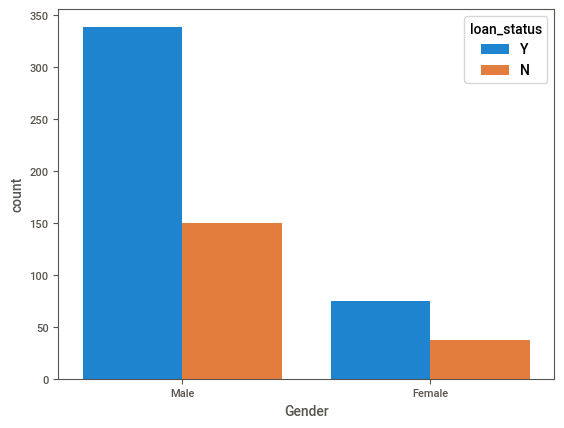

In [ ]:
sns.countplot(x= data['Gender'], hue = data['loan_status'])

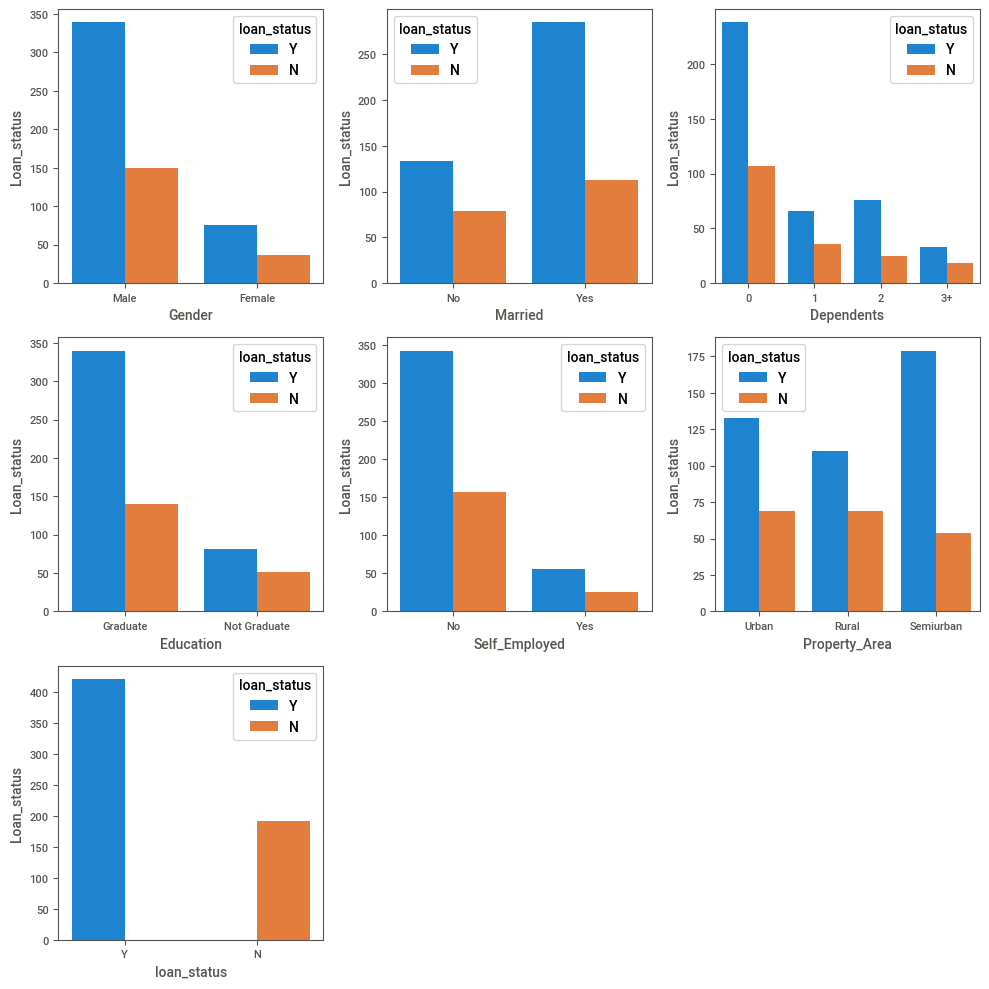

In [ ]:
plt.figure(figsize= (10,10))
plot = 1
for i in cat_col.drop('Loan_ID', axis =1):
    if plot <= 9:
        ax = plt.subplot(3,3,plot)
        sns.countplot(x= data[i], hue = data['loan_status'])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Loan_status', fontsize=10)
    plot +=1

plt.tight_layout()

# multivariate analysis

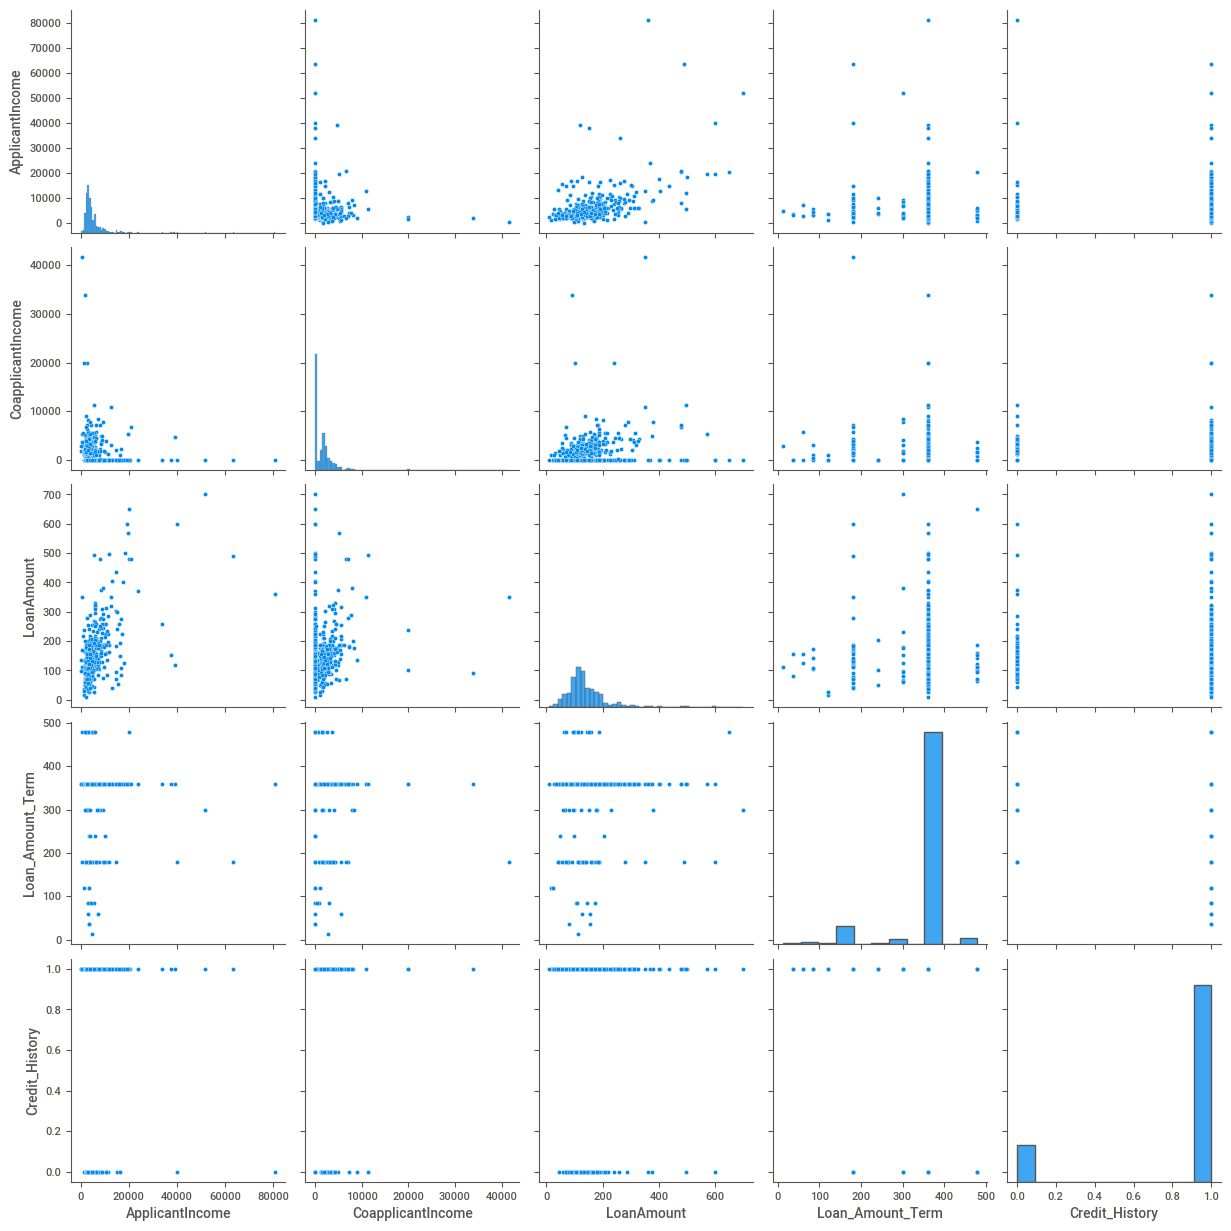

In [ ]:
sns.pairplot(data)

# Preprocessing the data

In [ ]:
# null/missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
loan_status           0
dtype: int64

In [ ]:
(data.isnull().sum()/len(data))*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
loan_status          0.000000
dtype: float64

In [ ]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# replacing null values of gender column with mode
data.loc[data['Gender'].isnull()==True, 'Gender']= 'Male'

In [ ]:
data['Gender'].isnull().sum()

0

In [ ]:
# married
data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [ ]:
# replacing null values of married column with mode
data.loc[data['Married'].isnull()==True, 'Married']= 'Yes'

In [ ]:
data['Married'].isnull().sum()

0

In [ ]:
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [ ]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
# replacing null values of married column with mode
data.loc[data['Dependents'].isnull()==True, 'Dependents']= 1

In [ ]:
data['Dependents'].isnull().sum()

0

In [ ]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [ ]:
# replacing null values of married column with mode
data.loc[data['Self_Employed'].isnull()==True, 'Self_Employed']= 'No'

<Axes: ylabel='Density'>

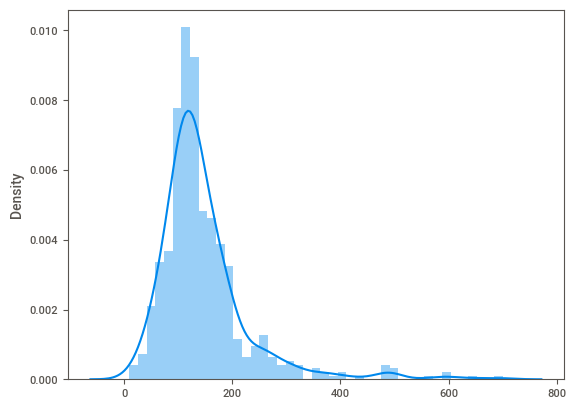

In [ ]:
# check distribution of Loanamount
sns.distplot(x=data['LoanAmount'])

In [ ]:
data.loc[data['LoanAmount'].isnull()==True, 'LoanAmount'] = data['LoanAmount'].median()

In [ ]:
data['LoanAmount'].isnull().sum()

0

<Axes: ylabel='Density'>

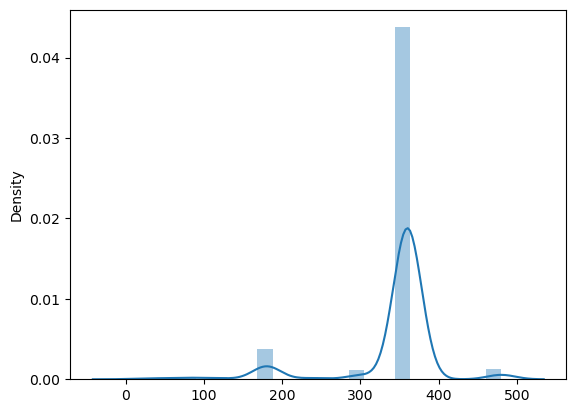

In [ ]:
sns.distplot(x=data['Loan_Amount_Term'])

In [ ]:
data.loc[data['Loan_Amount_Term'].isnull()== True, 'Loan_Amount_Term'] = data['Loan_Amount_Term'].median()

In [ ]:
data['Loan_Amount_Term'].isnull().sum()

0

<Axes: ylabel='Density'>

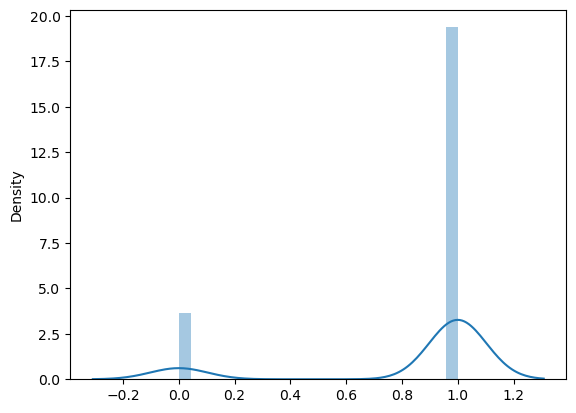

In [ ]:
sns.distplot(x=data['Credit_History'])

In [ ]:
data.loc[data['Credit_History'].isnull()== True, 'Credit_History'] = data['Credit_History'].median()

In [ ]:
data['Credit_History'].isnull().sum()

0

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
loan_status          0
dtype: int64

<Axes: xlabel='ApplicantIncome'>

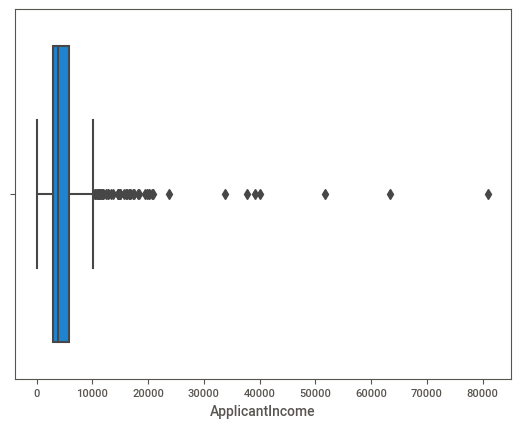

In [ ]:
# identifying outlier
sns.boxplot(x=data['ApplicantIncome'])

In [ ]:
num_col  = data.select_dtypes(include=['int64', 'float64'])
num_col.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


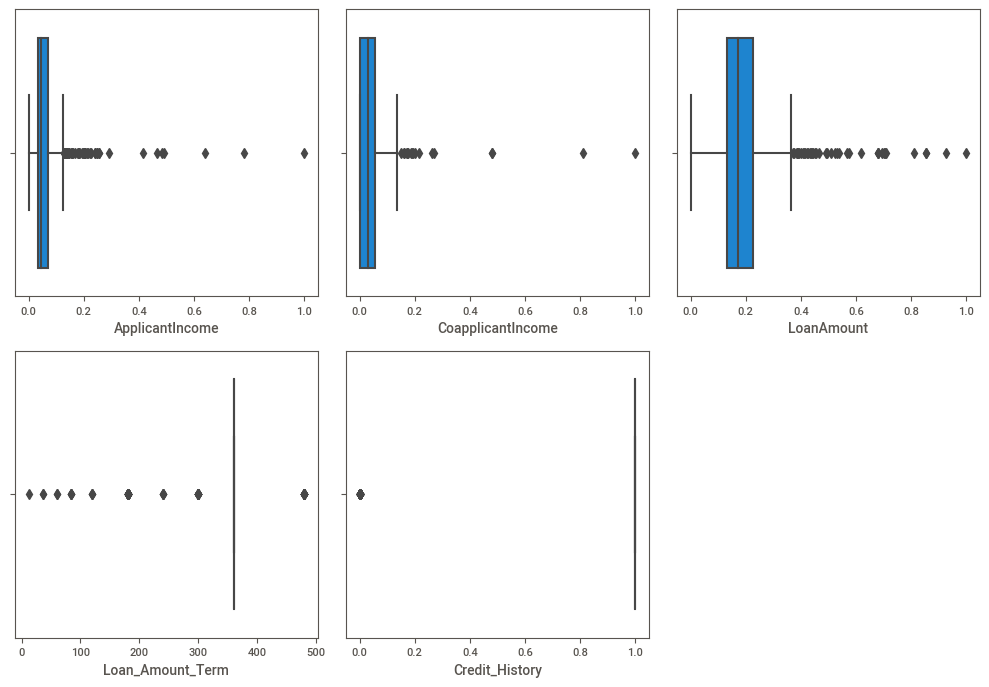

In [ ]:
plt.figure(figsize= (10,10))
plot = 1
for i in num_col:
    if plot <= 5:
        ax = plt.subplot(3,3,plot)
        sns.boxplot(x=data[i])
        plt.xlabel(i, fontsize=10)
    plot +=1

plt.tight_layout()

In [ ]:
# minmax scaler -[0,1] >> (x-xmin)/xmax-xmin >>> when data is not normally distributed
# standard scaler -[-3,3] > x-mean/sigma >> when data is normally distributed

In [ ]:
# 12,13,14,17 >>> (13-12)/(17-12)

In [ ]:
(13-12)/(17-12)

0.2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = \
sc.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Urban,Y


In [ ]:
data2 = data.copy()
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Urban,Y


In [ ]:
df1 = pd.get_dummies(data2['Gender'],dtype = 'int',prefix='Gender',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Gender',axis=1)

In [ ]:
df1 = pd.get_dummies(data2['Married'],dtype = 'int',prefix='Married',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Married',axis=1)

In [ ]:
df1 = pd.get_dummies(data2['Dependents'],dtype = 'int',prefix='Dependents',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Dependents',axis=1)

In [ ]:
df1 = pd.get_dummies(data2['Education'],dtype = 'int',prefix='Education',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Education',axis=1)

In [ ]:
df1 = pd.get_dummies(data2['Self_Employed'],dtype = 'int',prefix='Self_Employed',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Self_Employed',axis=1)

In [ ]:
df1 = pd.get_dummies(data2['Property_Area'],dtype = 'int',prefix='Property_Area',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Property_Area',axis=1)

In [ ]:
data2

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,loan_status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,1,0,0,0,0,0,0,1
1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,1,0,0,0,0,0,0
2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,1,0,0,0,0,1,0,1
3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,0,0,1,0,0,1
4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,1,0,0,0,0,0,0,0
610,LP002979,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,1,0,0,0,0
611,LP002983,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,1,0,0,0,0,0,1
612,LP002984,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,0,0,0,1


# Feature Selection

In [ ]:
# 1, drop the irrelevant columns
data2.drop('Loan_ID',axis =1 ,inplace=True)

In [ ]:
# co relation
df2 = data2[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

<Axes: >

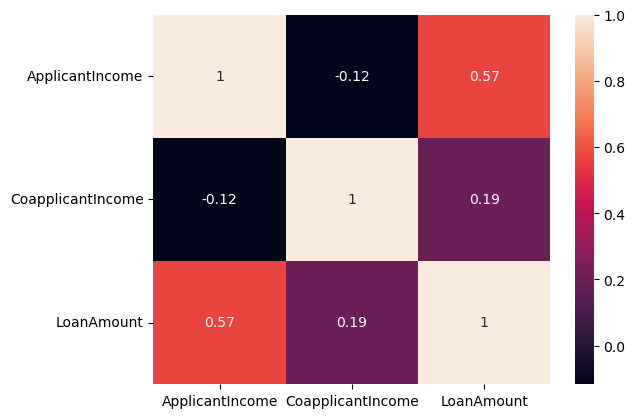

In [ ]:
sns.heatmap(df2.corr(),annot=True)

In [ ]:
#We are not dropping any column, we retain every feature for model to learn

# Model Building

In [ ]:
#lets encode the target column
# Y = 1 , N = 0
data2['loan_status'] = data2['loan_status'].map({'Y':1,'N':0})

In [ ]:
data2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,loan_status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.172214,360.0,1.0,1,1,0,1,0,0,0,0,0,0,1
1,0.054830,0.036192,0.172214,360.0,1.0,0,1,1,0,1,0,0,0,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,1,1,0,0,0,0,1,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,1,0,0,0,1,0,0,1
4,0.072356,0.000000,0.191027,360.0,1.0,1,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,360.0,1.0,1,0,0,1,0,0,0,0,0,0,0
610,0.048930,0.000000,0.044863,180.0,1.0,1,1,1,0,0,0,1,0,0,0,0
611,0.097984,0.005760,0.353111,360.0,1.0,1,1,1,0,1,0,0,0,0,0,1
612,0.091936,0.000000,0.257598,360.0,1.0,1,1,1,0,0,1,0,0,0,0,1


In [ ]:
# split the entire data into x and y
x = data2.drop('loan_status',axis=1)
y = data2['loan_status']

In [ ]:
# split out entire data into traning and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=3)

In [ ]:
x_train.shape

(429, 15)

In [ ]:
y_train.shape

(429,)

In [ ]:
x_test.shape

(185, 15)

In [ ]:
y_test.shape

(185,)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [ ]:
#balancing is always performed on training data
x_smote, y_smote = sm.fit_resample(x_train,y_train)

In [ ]:
#from now on the training data is x_smote and y_smote

In [ ]:
#Counter is a cantainer whihc tells you how many equivalent records were added
from collections import Counter
Counter(y_train)

Counter({1: 282, 0: 147})

In [ ]:
Counter(y_smote)

Counter({0: 282, 1: 282})

In [ ]:
#Algorithm

#import the algorithm
from sklearn.svm import SVC

#intialize
model = SVC()

#train the model
model.fit(x_smote,y_smote)

SVC()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7621621621621621

# Hyperparameter Tuning

In [ ]:
#define the parameters
param_grid = {'C':[1,5,10,50,60,70],'gamma':[0.1,0.01,0.001,0.02,0.032,0.001],'random_state':list(range(1,20))}

In [ ]:
from sklearn.model_selection import GridSearchCV

svc = SVC()

grid = GridSearchCV(svc,param_grid,cv=5,scoring='accuracy',verbose=2)

grid.fit(x_smote,y_smote)

Fitting 5 folds for each of 684 candidates, totalling 3420 fits
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.1s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END .....................C=1, gamma=0.1,

[CV] END ....................C=1, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ...................C=1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1, gamma=0.02, random_state=6; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=6; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=6; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ...................C=1, gamma=0.032, random_state=7; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=8; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=8; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=8; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=8; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=8; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=9; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=9; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=9; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=9; total time=   0.0s
[CV] END ...................C=1, gamma=0.032, random_state=9; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=10; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ..................C

[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=5, gamma=0.02, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.032, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=10, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=10, gamma=0.032, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.032, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.032, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=11; total time=   0.0s
[CV] END .................C=

[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=

[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=50, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ..................C=50, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ..................C=50, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ..................C=50, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ..................C=50, gamma=0.02, random_state=18; total time=   0.0s
[CV] END ..................C=50, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.032, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.032, random_state=1; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.032, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C

[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=60, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C=60, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C=60, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C=60, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=12; total time=   0.0s
[CV] END .................C=

[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=

[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=70, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.032, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.032, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.032, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.032, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.032, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.032, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.032, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.032, random_state=2; total time=   0.1s
[CV] END ..................C

[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50, 60, 70],
                         'gamma': [0.1, 0.01, 0.001, 0.02, 0.032, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [ ]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.032, 'random_state': 1}


In [ ]:
model1 = SVC(C=10,gamma=0.032,random_state=1)
model1.fit(x_smote,y_smote)

SVC(C=10, gamma=0.032, random_state=1)

In [ ]:
y_pred1 = model1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.6702702702702703